In [571]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [572]:
def roc_and_confusin(y_test, y_pred, y_pred_proba):
    from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

    print('AUC:', roc_auc_score(y_test, y_pred_proba))

    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))

In [573]:
#importing the datasets and creating the full one
dataset_original_mutation = pd.read_csv('csv_data\mutation.csv')
dataset_original_mutation['Mutation'] = 1
dataset_original_no_mutation = pd.read_csv('csv_data/no_mutation.csv')
dataset_original_no_mutation['Mutation'] = 0
dataset_original = pd.concat([dataset_original_mutation, dataset_original_no_mutation]).drop(columns=['filename'])
#shuffling the dataset
dataset_original = dataset_original.sample(frac=1).reset_index(drop=True)

dataset_over700 = pd.read_csv('csv_data\OVER700_anonym.csv')
dataset_over700['Mutation'] = 0

dataset_less300 = pd.read_csv('csv_data\LESS300_anonym.csv')
dataset_less300['Mutation'] = 1

dataset_generated_mut = pd.read_csv('csv_data\mutation_augmented.csv')
dataset_generated_mut['Mutation'] = 1

dataset_generated_no_mut = pd.read_csv('csv_data/no_mutation_augmented.csv')
dataset_generated_no_mut['Mutation'] = 0

dataset_generated = pd.concat([dataset_generated_mut, dataset_generated_no_mut])
dataset_generated.drop(columns=['filename'], inplace=True)
dataset_generated = dataset_generated.sample(frac=1).reset_index(drop=True)


#dataset = pd.concat([dataset_original, dataset_generated])

dataset = dataset_original

#dataset

In [574]:
#dataset_generated

In [575]:
tmp1 = dataset_less300["diagnostics_Image-original_Mean"]
tmp2 = dataset_less300["diagnostics_Mask-original_VoxelNum"]
tmp3 = dataset_over700["diagnostics_Image-original_Mean"]
tmp4 = dataset_over700["diagnostics_Mask-original_VoxelNum"]

dataset_less300 =  dataset_less300[dataset_less300.columns.drop(list(dataset_less300.filter(regex='diagnostics')))]
dataset_over700 =  dataset_over700[dataset_over700.columns.drop(list(dataset_over700.filter(regex='diagnostics')))]

dataset_less300 = pd.concat([tmp1, tmp2, dataset_less300], axis=1)
dataset_over700 = pd.concat([tmp3, tmp4, dataset_over700], axis=1)

dataset_less300 = dataset_less300.drop(columns=['name', 'mutation'])
dataset_over700 = dataset_over700.drop(columns=['name', 'mutation'])

#dataset_less300

In [576]:
#dataset_over700

In [577]:
from sklearn.feature_selection import SelectKBest, chi2

# Разделение данных на признаки и целевую переменную
X = dataset.drop(columns=['Mutation'])
y = dataset['Mutation']

k = 20  # Количество признаков для выбора
selector = SelectKBest(k=k)
X_new = selector.fit_transform(X, y)

# Получение имен выбранных признаков
selected_features = X.columns[selector.get_support()]

#print("Selected features:")
#print(selected_features)

#Добавим к selected_features Mutation и Generated
selected_features = selected_features.insert(0, 'Mutation')
#Оставим только выбранные признаки
dataset1 = dataset#[selected_features]
dataset_less300 = dataset_less300#[selected_features]
dataset_over700 = dataset_over700#[selected_features]
dataset_generated = dataset_generated#[selected_features]

In [639]:
X = dataset1.drop(['Mutation'], axis=1)
y = dataset1['Mutation']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

dataset_smote = pd.concat([X_res, y_res], axis=1)

#Уберем из X_res и y_res строчки ктоторые есть в X_train и y_train
mask = dataset_smote.isin(dataset.to_dict(orient='list')).all(axis=1)
common_rows = dataset_smote[mask]

#Уберем dataset_smote строчки ктоторые есть в common_rows
mask = dataset_smote.isin(common_rows.to_dict(orient='list')).all(axis=1)
dataset_smote = dataset_smote[~mask]

X_train, X_test, y_train, y_test = train_test_split(dataset1.drop(['Mutation'], axis=1), dataset1['Mutation'], test_size=0.33, random_state=42)


#Добавляем smote
X_train = pd.concat([X_train, dataset_smote.drop(['Mutation'], axis=1)])
y_train = pd.concat([y_train, dataset_smote['Mutation']])

#Добавляем generated
X_train = pd.concat([X_train, dataset_generated.drop(['Mutation'], axis=1)])
y_train = pd.concat([y_train, dataset_generated['Mutation']])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(358, 109) (358,)
(30, 109) (30,)


In [640]:
#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



X_less300 = dataset_less300.drop(['Mutation'], axis=1)
y_less300 = dataset_less300['Mutation']

X_less300 = sc.transform(X_less300)

X_over700 = dataset_over700.drop(['Mutation'], axis=1)
y_over700 = dataset_over700['Mutation']

X_over700 = sc.transform(X_over700)


0:	learn: 0.6433165	total: 23.9ms	remaining: 23.8s
100:	learn: 0.0168398	total: 1.43s	remaining: 12.7s
200:	learn: 0.0044082	total: 2.54s	remaining: 10.1s
300:	learn: 0.0026113	total: 3.53s	remaining: 8.2s
400:	learn: 0.0021460	total: 4.46s	remaining: 6.66s
500:	learn: 0.0020062	total: 5.38s	remaining: 5.36s
600:	learn: 0.0019387	total: 6.55s	remaining: 4.35s
700:	learn: 0.0018747	total: 7.49s	remaining: 3.19s
800:	learn: 0.0017938	total: 8.33s	remaining: 2.07s
900:	learn: 0.0017160	total: 9.09s	remaining: 998ms
999:	learn: 0.0016842	total: 9.81s	remaining: 0us
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.77      0.87        22

    accuracy                           0.83        30
   macro avg       0.81      0.89      0.82        30
weighted avg       0.90      0.83      0.84        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       

c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

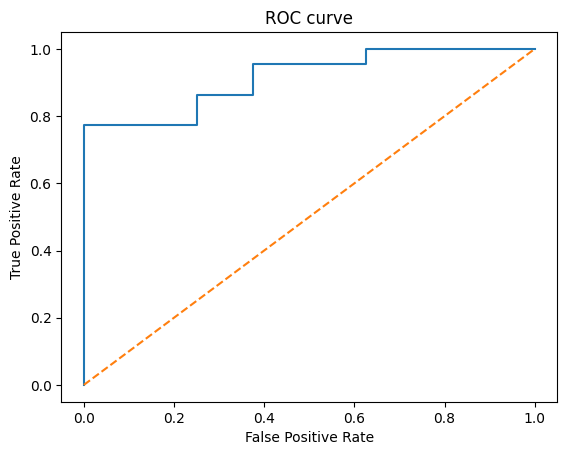

AUC: 0.9147727272727273
Confusion matrix:
[[ 8  0]
 [ 5 17]]


In [641]:
#catboost
from catboost import CatBoostClassifier

classifier_cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100, random_state=42)

classifier_cb.fit(X_train, y_train)

y_pred = classifier_cb.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_gb.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_gb.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_gb.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.94      0.77      0.85        22

    accuracy                           0.80        30
   macro avg       0.76      0.82      0.77        30
weighted avg       0.85      0.80      0.81        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69        57

    accuracy                           0.53        57
   macro avg       0.50      0.26      0.34        57
weighted avg       1.00      0.53      0.69        57

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        46
           1       0.00      0.00      0.00         0

    accuracy                           0.35        46
   macro avg       0.50      0.17      0.26        46
weighted avg       1.00      0.35      0.52        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

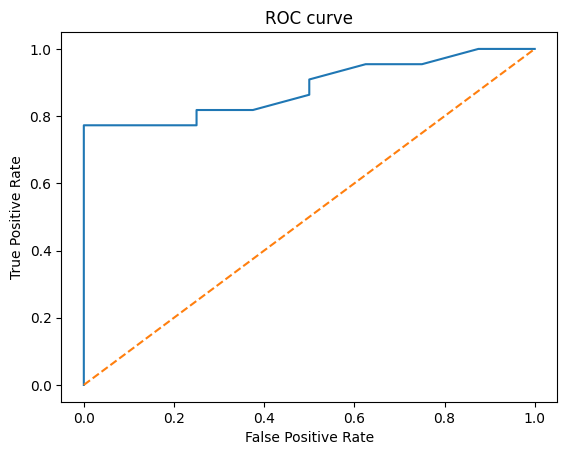

AUC: 0.8835227272727273
Confusion matrix:
[[ 7  1]
 [ 5 17]]


In [642]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_rf.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_rf.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_rf.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.94      0.77      0.85        22

    accuracy                           0.80        30
   macro avg       0.76      0.82      0.77        30
weighted avg       0.85      0.80      0.81        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70        57

    accuracy                           0.54        57
   macro avg       0.50      0.27      0.35        57
weighted avg       1.00      0.54      0.70        57

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        46
           1       0.00      0.00      0.00         0

    accuracy                           0.41        46
   macro avg       0.50      0.21      0.29        46
weighted avg       1.00      0.41      0.58        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

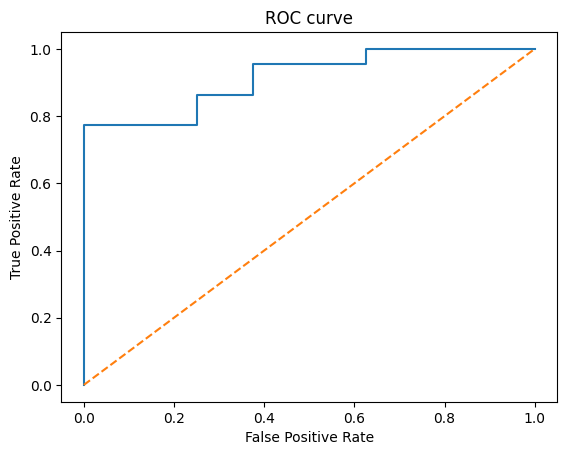

AUC: 0.9147727272727273
Confusion matrix:
[[ 7  1]
 [ 5 17]]


In [643]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(random_state=42)

classifier_gb.fit(X_train, y_train)

y_pred = classifier_gb.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_gb.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_gb.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_gb.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.40      0.75      0.52         8
           1       0.87      0.59      0.70        22

    accuracy                           0.63        30
   macro avg       0.63      0.67      0.61        30
weighted avg       0.74      0.63      0.65        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67        57

    accuracy                           0.51        57
   macro avg       0.50      0.25      0.34        57
weighted avg       1.00      0.51      0.67        57

              precision    recall  f1-score   support

           0       1.00      0.28      0.44        46
           1       0.00      0.00      0.00         0

    accuracy                           0.28        46
   macro avg       0.50      0.14      0.22        46
weighted avg       1.00      0.28      0.44        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

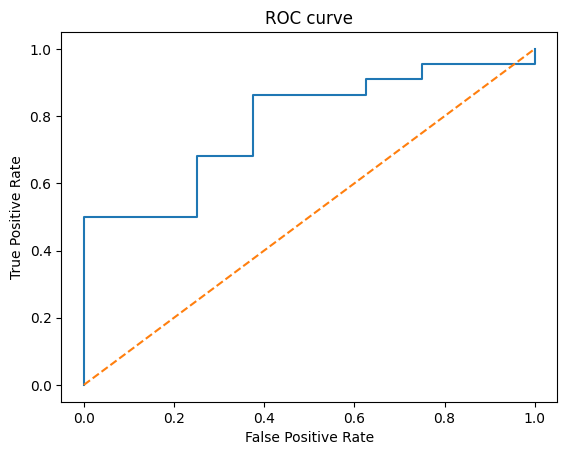

AUC: 0.7784090909090909
Confusion matrix:
[[ 6  2]
 [ 9 13]]


In [644]:
#Training the Logistic Regression model on the Training set
classifier_logreg = LogisticRegression(random_state=42)

classifier_logreg.fit(X_train, y_train)

y_pred = classifier_logreg.predict(X_test)

print(classification_report(y_test, y_pred))



y_less300_pred = classifier_logreg.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_logreg.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_logreg.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       0.92      0.50      0.65        22

    accuracy                           0.60        30
   macro avg       0.65      0.69      0.59        30
weighted avg       0.78      0.60      0.62        30



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.44      0.61        57

    accuracy                           0.44        57
   macro avg       0.50      0.22      0.30        57
weighted avg       1.00      0.44      0.61        57

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        46
           1       0.00      0.00      0.00         0

    accuracy                           0.54        46
   macro avg       0.50      0.27      0.35        46
weighted avg       1.00      0.54      0.70        46



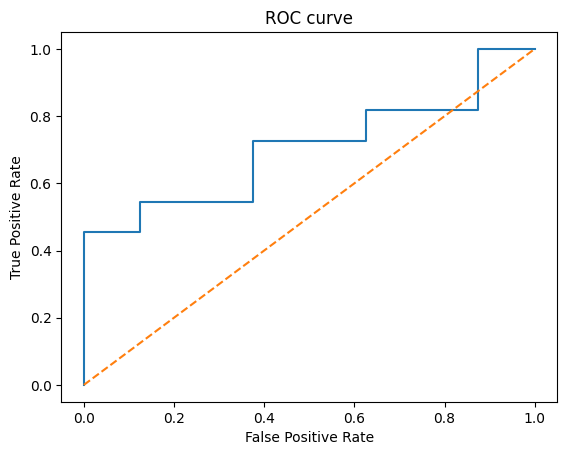

AUC: 0.7045454545454546
Confusion matrix:
[[ 7  1]
 [11 11]]


In [645]:
from sklearn.svm import SVC

classifier_svm = SVC(random_state=42)

classifier_svm.fit(X_train, y_train)

y_pred = classifier_svm.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_svm.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_svm.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_svm.decision_function(X_test))